### Huggingface hub datasets

In [16]:
from huggingface_hub import list_datasets

In [17]:
all_datasets=list_datasets()

In [3]:
next(all_datasets)

DatasetInfo: { 
  {'_id': '621ffdd236468d709f181d58',
   'author': None,
   'cardData': None,
   'citation': '@inproceedings{veyseh-et-al-2020-what,\n'
               '   title={{What Does This Acronym Mean? Introducing a New Dataset for Acronym Identification and '
               'Disambiguation}},\n'
               '   author={Amir Pouran Ben Veyseh and Franck Dernoncourt and Quan Hung Tran and Thien Huu Nguyen},\n'
               '   year={2020},\n'
               '   booktitle={Proceedings of COLING},\n'
               '   link={https://arxiv.org/pdf/2010.14678v1.pdf}\n'
               '}',
   'description': 'Acronym identification training and development sets for the acronym identification task at '
                  'SDU@AAAI-21.',
   'disabled': False,
   'downloads': 3273,
   'gated': False,
   'id': 'acronym_identification',
   'lastModified': '2023-01-25T14:18:28.000Z',
   'likes': 17,
   'paperswithcode_id': 'acronym-identification',
   'private': False,
   'sha': 'c3c245a1

### datasets dataset

In [1]:
#pip install datasets

In [3]:
from datasets import load_dataset

In [4]:
emotions=load_dataset('emotion')

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds=emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [38]:
train_ds.column_names

['text', 'label']

In [32]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [35]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [39]:
train_ds[:3]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3]}

In [41]:
train_ds['text'][:3]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong']

In [42]:
train_ds['label'][:3]

[0, 0, 3]

### Managing external dataset

In [43]:
#1 wget을 이용해 url 상의 데이터 다운로드
#2 다운로드된 파일을 한번 확인하기 위해 head -파일 개수 파일이름 을 사용해 확인
#3 load_dataset('파일 형식',data_files='파일 이름', sep='구분자', names=['column1','column2', ...])
#4 또는 아예 그냥 다룬로드를 하지 않고
# load_dataset('파일 형식',data_files='!!!! url 파일 경로!!!!!dl=1', sep='구분자', names=['column1','column2', ...])

### dataset into DataFrame

In [7]:
import pandas as pd

In [15]:
# emotions.set_format(type='pandas')
# train_df=emotions['train'][:]
# train_df.head()

In [8]:
# "emotions" 데이터셋을 로드합니다.
dataset = load_dataset("emotion")

# 데이터셋을 pandas DataFrame으로 변환합니다.
df = pd.DataFrame(dataset['train'])

# DataFrame을 확인합니다.
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [22]:
# 방법 1
def label_int2str(label):
    return emotions['train'].features['label'].int2str(label)

df['label_name']=df['label'].apply(label_int2str)
df.head()

# 방법 2
# label과 mapping되는 사전을 생성한 다음에 .apply 또는 .map을 적용하여 변환

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Data analysis

### label distribution

In [10]:
import matplotlib.pyplot as plt

In [33]:
df["label_name"].value_counts()

label_name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [36]:
df["label_name"].value_counts().index

Index(['joy', 'sadness', 'anger', 'fear', 'love', 'surprise'], dtype='object', name='label_name')

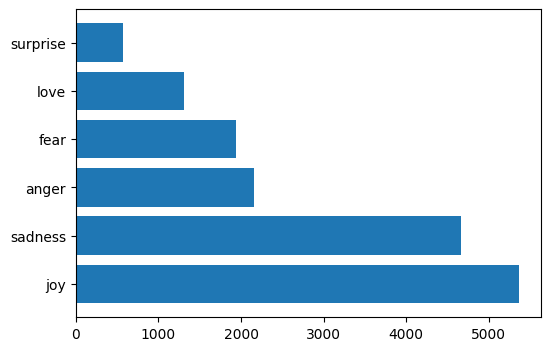

In [58]:
plt.figure(figsize=(6,4))
plt.barh(df["label_name"].value_counts().index,df["label_name"].value_counts())
plt.show()

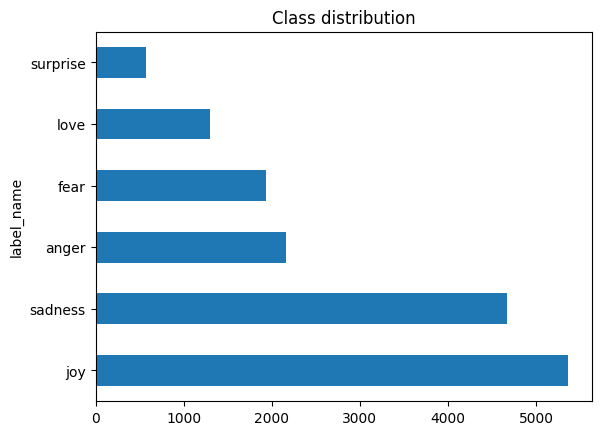

In [57]:
df["label_name"].value_counts().plot.barh()
plt.title('Class distribution')
plt.show()